Ce notebook consiste à explorer et analyser un jeu de données récupéré sur [Kaggle]("https://www.kaggle.com/austinreese/craigslist-carstrucks-data")  
Il s'agit d'un fichier csv regroupant les ventes de voitures aux USA sur la platforme Craiglist.  
Nous avons ici affaire a un probleme de regression: Predire le prix d'une voiture en fonction de plusieurs caracteristiques



# 1. Data Analysis

## Objectif :
- Comprendre du mieux possible nos données 
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : price
- **lignes et colonnes** : 423857, 25
- **types de variables** : qualitatives : 19, quantitatives : 6
- **Analyse des valeurs manquantes** :
    - NaN (5 variables avec +- 50% de NaN)
- **Analyse des valeurs aberrantes** :  
    - Voitures gratuites (0 dollar)
    - Voitures datant de 1900 ou de 2021
    - Voiture coutant plus de 3 milliards

#### Analyse de Fond :
- **Visualisation de la target** :
    - Rangee de prix allant de 0 a 3 milliards de dollars
    - Asymétriques (Right skewed): Queue de distribution etalee vers la droite (coeff: 286.66)
    
    
    
- **Signification des variables** :
    -  variables continues non standardisées
    - id -------------> identifiant de l'annonce/voiture
    - url ------------> lien de l'annonce
    - region ---------> region/ ville ou se trouve la voiture
    - region_url -----> url de la region sur craiglist
    - year -----------> annee de la mise en circulation
    - manufacturer ---> marque
    - model ----------> modele du vehicule
    - condition ------> etat (neuf, bon, mauvais...)
    - cylinders ------> nombre de cylindres
    - fuel -----------> carburant
    - odometer -------> odometre/ compteur kilometrique
    - title_status ---> etat de proprete 
    - transmission ---> boite de vitesse 
    - vin ------------> plaque d'immatriculation
    - drive ----------> roues motrices
    - size -----------> taille du vehicule
    - type -----------> type de vehicule
    - paint_color ----> couleur
    - image_url ------> lien de la photo du vehicule
    - description ----> descriptif
    - county ---------> conte
    - state ----------> etat
    - lat/ long ------> coordonnees geo  
    

- **Relation Variables / Target** :
    - target / year : correlation positive: plus la voiture est recente, plus le prix est eleve 
    - target/odometer : correlation negative: plus il y a de km parcourus, plus le prix est faible
    - target / fuel : les voitures diesel sont en moyenne bien plus cheres
    
- **Relation Variables / Variables** :
    - odometer/year : plus la voiture est age, plus il y a de km parcourus
    - odometer/condition: l'etat de la voiture se degrade au fur et a mesure qu'il y a de plus en plus de km parcourus
    
    
    

    

In [1]:
# Import des librairies
import warnings
warnings.filterwarnings('ignore')
from ml_utils import *

Shape: (423857, 25)
-----------------
id --> Type:num | Nas: 0(0%) | Min-Max: (7178301636)-(7197006076) | Possible PK
url --> Type:cat | Nas: 0(0%) | Categories: 423857 | Possible PK
region --> Type:cat | Nas: 0(0%) | Categories: 404
region_url --> Type:cat | Nas: 0(0%) | Categories: 413
price --> Type:num | Nas: 0(0%) | Min-Max: (0)-(3808256046)
year --> Type:num | Nas: 95114(22%) | Min-Max: (1900)-(2021)
manufacturer --> Type:cat | Nas: 110615(26%) | Categories: 43
model --> Type:cat | Nas: 98473(23%) | Categories: 27042
condition --> Type:cat | Nas: 247138(58%) | Categories: 6
cylinders --> Type:cat | Nas: 226178(53%) | Categories: 8
fuel --> Type:cat | Nas: 96643(22%) | Categories: 5
odometer --> Type:num | Nas: 153272(36%) | Min-Max: (0)-(10000000)
title_status --> Type:cat | Nas: 96098(22%) | Categories: 6
transmission --> Type:cat | Nas: 95792(22%) | Categories: 3
vin --> Type:cat | Nas: 239437(56%) | Categories: 103588
drive --> Type:cat | Nas: 192738(45%) | Categories: 3
size 

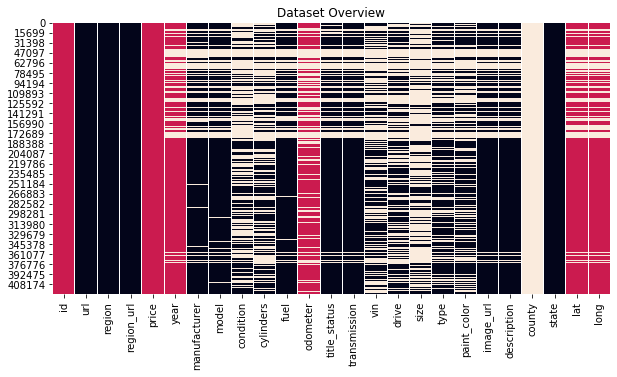

 Categerocial   Numerical   NaN 


In [2]:
#Import des donnees
data = pd.read_csv('vehicles.csv')
dtf_overview(data, max_cat=20, figsize=(10,5))

In [3]:
# Afficher toutes les colonnes
pd.set_option('display.max_column', 25)

In [4]:
# Apercu dataset
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [5]:
# Copie du dataset original
df = data.copy()

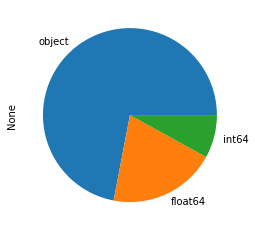

In [6]:
# Repartition du type de variables
df.dtypes.value_counts().plot.pie()

In [7]:
# Pourcentage des NaN par colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

county          1.000000
size            0.757874
condition       0.583069
vin             0.564900
cylinders       0.533619
paint_color     0.475760
drive           0.454724
type            0.431042
odometer        0.361613
manufacturer    0.260972
long            0.234638
lat             0.234638
model           0.232326
fuel            0.228009
title_status    0.226723
transmission    0.226001
year            0.224401
description     0.222252
image_url       0.222235
state           0.000000
price           0.000000
region_url      0.000000
region          0.000000
url             0.000000
id              0.000000
dtype: float64

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [8]:
# Supression des colonnes ayant plus de 80% de Nan
df = df[df.columns[df.isna().sum()/df.shape[0] <0.8]]
# Suppression des colonnes inutiles
df= df.drop(columns= ['id', 'url','region','region_url','image_url','vin','description','lat','long'], axis=1)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


### 2. Visulation de la colonne Target (price)

In [9]:
#Target Variable skewness (asymetrique)
print(df['price'].skew())

286.6653149470297


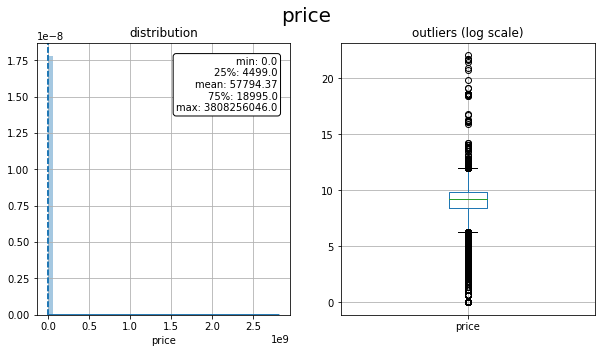

In [10]:
#Target Variable
freqdist_plot(df, 'price', box_logscale=True, figsize=(10,5))

On se rend compte qu'il y a beaucoup d'outliers (voitures gratuites (min=0$) et une voiture a plus de 3 milliards) au niveau de la colonne 'price'. Je vais m'en debarasser en utilisant la technique du IQR-score

### 3. Suppression des outliers

In [11]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [12]:
# Nouveau df sans outlier de la colonne price
df1 = remove_outlier(df, 'price')
df1.describe()

,price,year,odometer
count,404819.000000,314148.000000,2.572290e+05
mean,11882.827303,2009.630805,1.024481e+05
std,9865.142288,9.974896,1.217890e+05
min,0.000000,1900.000000,0.000000e+00
25%,4000.000000,2007.000000,4.892400e+04
50%,9500.000000,2012.000000,9.500000e+04
75%,17500.000000,2016.000000,1.400000e+05
max,40712.000000,2021.000000,1.000000e+07


Il n'y a plus de voitures a prix exorbitant, par contre il reste des voitures gratuites (min=0). Je filtrerai le dataset en choisissant des voitures ayant un prix minimal de 500$.  
La colonne year comporte des voitures datant de 1900 et meme de 2021....  
La colonne odometer contient une voiture ayant parcouru 10 millions de km  
Il va falloir filtrer ces deux colonnes aussi

In [14]:
# Les donnees sont beaucoup plus centrees 
print(df1['price'].skew())

0.8976174940554765


In [16]:
# Nouveau df sans outlier de la colonne odometer
df2 = remove_outlier(df1, 'odometer')

In [17]:
# DF final filtre
df_final=  df2[(df2['price'] <= 40200 ) & (df2['price'] >= 500) ]
year_filter = (df_final['year'] > 1989) & (df_final['year'] <= 2020)
df_final= df_final.loc[year_filter]
print(df_final.shape)
df_final.describe()

(223594, 15)


,price,year,odometer
count,223594.000000,223594.000000,223594.000000
mean,14205.607780,2011.291153,100760.054389
std,9412.637882,5.631429,58860.162063
min,500.000000,1990.000000,0.000000
25%,6899.000000,2008.000000,52144.250000
50%,11999.000000,2012.000000,98000.000000
75%,19590.000000,2016.000000,141708.750000
max,40199.000000,2020.000000,276600.000000


### 4. Suppression des lignes a valeurs manquantes

In [18]:
df_final.isna().sum()

price                0
year                 0
manufacturer      6252
model             1531
condition        91690
cylinders        74826
fuel              1672
odometer             0
title_status      1293
transmission       965
drive            51634
size            147254
type             42236
paint_color      54686
state                0
dtype: int64

In [19]:
df_final= df_final.dropna(axis=0)
df_final.shape

(54684, 15)

Le dataset original comportait plus de 420000 lignes, apres traitement il ne reste que 54684 enregistrements pour notre future modele

In [20]:
# Apercu
df_final.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn
5,13995,2012.0,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,full-size,truck,grey,mn
6,7995,2010.0,chevrolet,equinox,good,4 cylinders,gas,108124.0,clean,automatic,4wd,full-size,SUV,grey,mn
7,8995,2011.0,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,mn
8,10995,2014.0,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white,mn


In [21]:
# Observation des differents etats des voitures
df_final.condition.value_counts()

excellent    26910
good         18810
like new      6619
fair          2001
new            194
salvage        150
Name: condition, dtype: int64

In [22]:
# Je vais regrouper les categories excellent et like new ensemble, et faire de meme avec fair et good
etat= {'excellent': 'like new', 'fair':'good'}
df_final['condition']= df_final['condition'].replace(etat)
df_final.condition.value_counts()

like new    33529
good        20811
new           194
salvage       150
Name: condition, dtype: int64

### Variables Qualitatives

In [23]:
# Visualiser les differentes classes par variables categorielles
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df_final[col].unique()}')

manufacturer-------------------------------------- ['gmc' 'ford' 'chevrolet' 'buick' 'hyundai' 'nissan' 'subaru' 'dodge'
 'toyota' 'lexus' 'volvo' 'ram' 'jaguar' 'chrysler' 'jeep' 'kia' 'honda'
 'volkswagen' 'bmw' 'pontiac' 'lincoln' 'mazda' 'infiniti' 'mercedes-benz'
 'saturn' 'audi' 'cadillac' 'acura' 'mercury' 'rover' 'mini' 'mitsubishi'
 'fiat' 'land rover' 'harley-davidson' 'tesla' 'alfa-romeo' 'aston-martin'
 'porche']
model--------------------------------------------- ['sierra classic 2500hd' 'f-150' 'equinox' ... 'juke nismo'
 'elantra se sedan 4d' 'mustang gt coupe']
condition----------------------------------------- ['good' 'like new' 'new' 'salvage']
cylinders----------------------------------------- ['8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 'other' '3 cylinders' '12 cylinders']
fuel---------------------------------------------- ['diesel' 'gas' 'electric' 'hybrid' 'other']
title_status-------------------------------------- ['clean' 'lien' 'rebu

Graph for manufacturer: total = 39


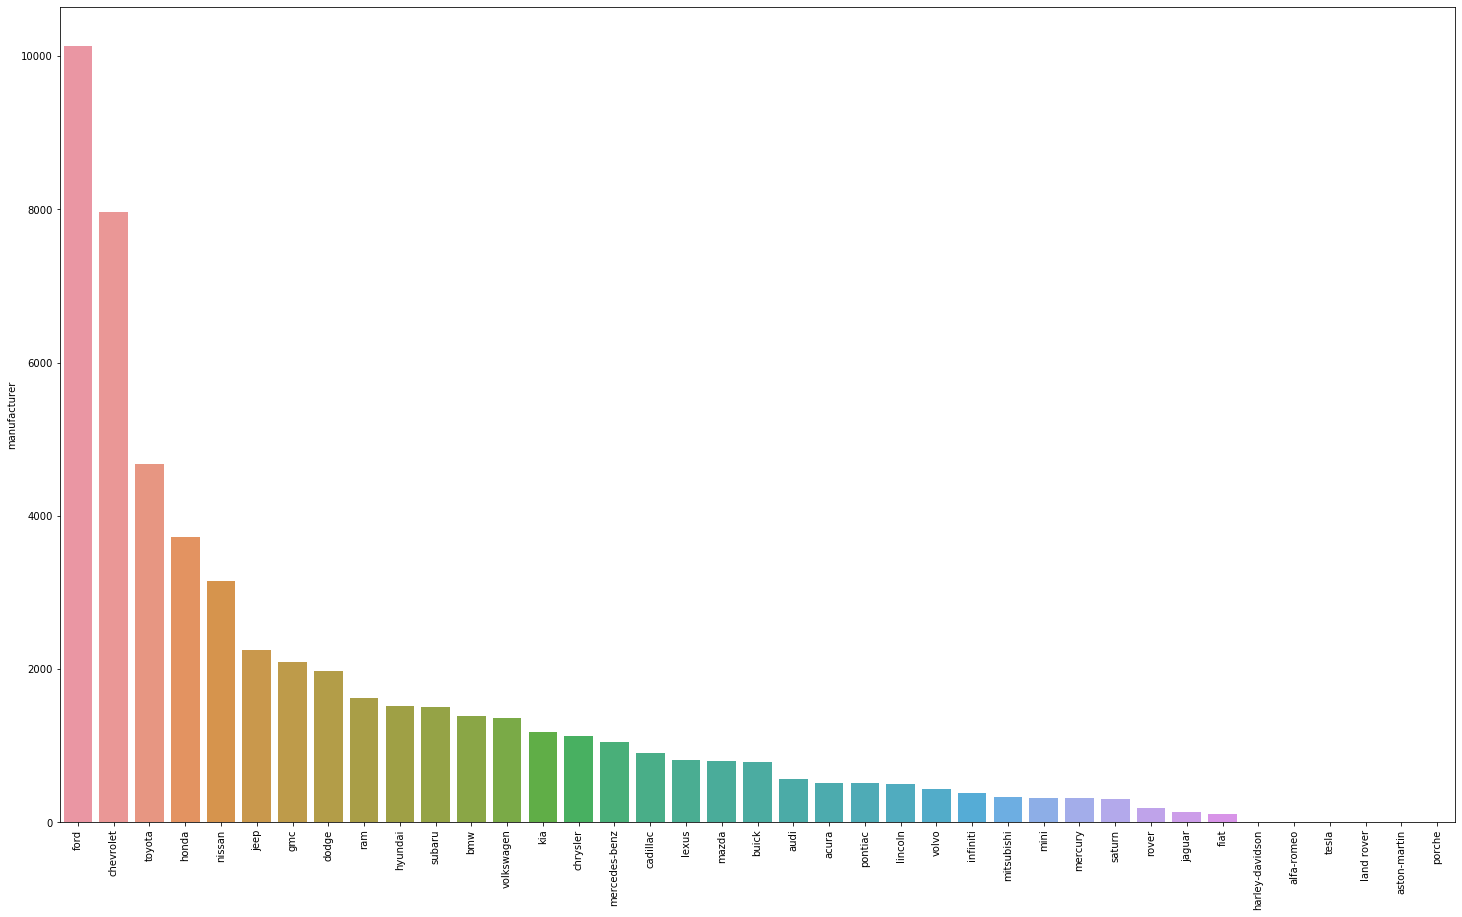

Graph for model: total = 7349


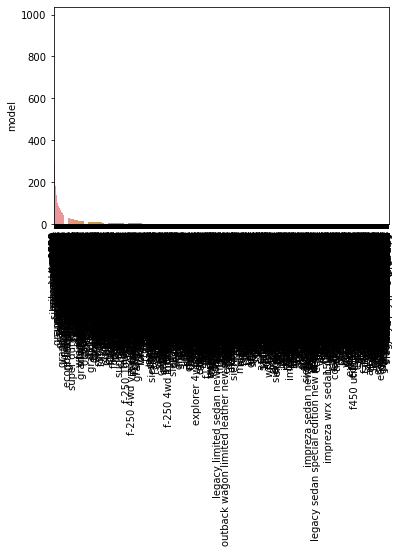

Graph for condition: total = 4


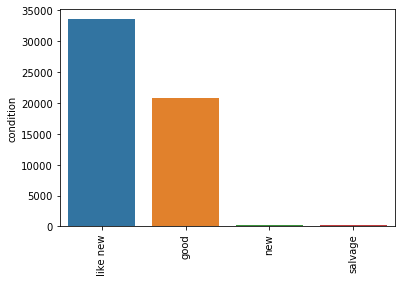

Graph for cylinders: total = 8


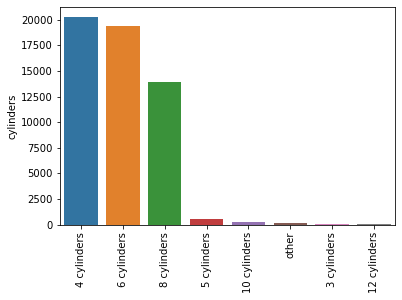

Graph for fuel: total = 5


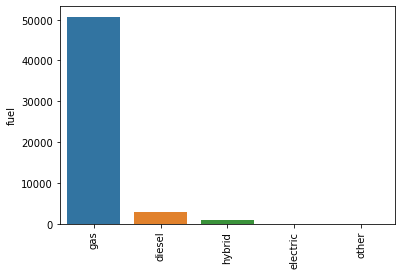

Graph for title_status: total = 6


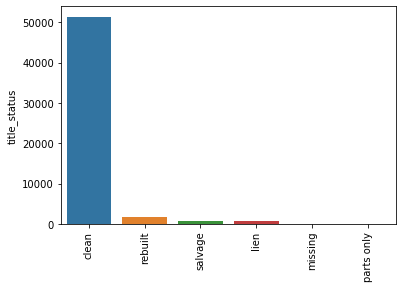

Graph for transmission: total = 3


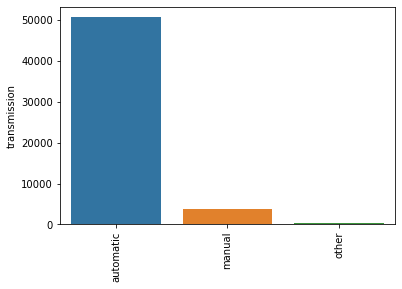

Graph for drive: total = 3


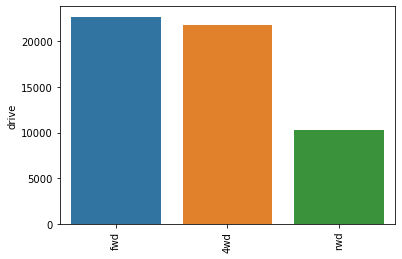

Graph for size: total = 4


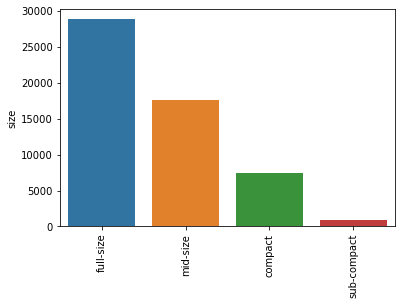

Graph for type: total = 13


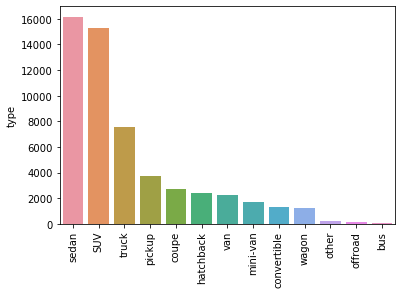

Graph for paint_color: total = 12


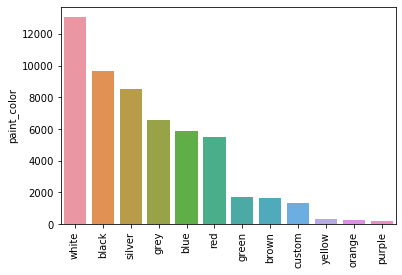

Graph for state: total = 51


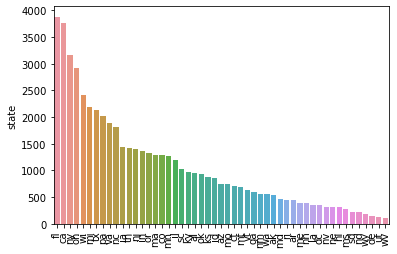

In [26]:
# Barplot des colonnes categorielles
plt.figure(figsize= (25,15))
df_cat= df_final.select_dtypes('object')
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i, len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

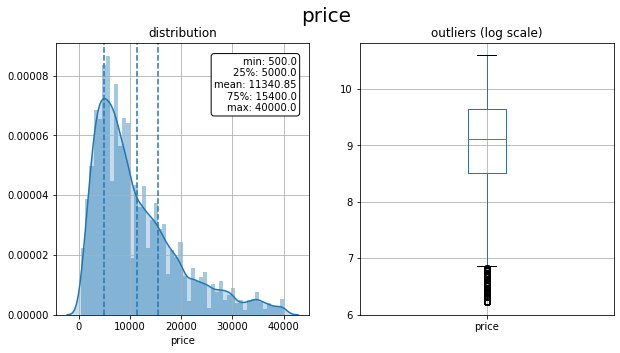

In [27]:
#Visualisation de la colonne Price du df_final
freqdist_plot(df_final, 'price', box_logscale=True, figsize=(10,5))

Un voiture coute en moyenne  11340$

## Relation Target / Variables


--- WARNING: Factorizing 39 labels of manufacturer ---
--- WARNING: Factorizing 7349 labels of model ---
--- WARNING: Factorizing 4 labels of condition ---
--- WARNING: Factorizing 8 labels of cylinders ---
--- WARNING: Factorizing 5 labels of fuel ---
--- WARNING: Factorizing 6 labels of title_status ---
--- WARNING: Factorizing 3 labels of transmission ---
--- WARNING: Factorizing 3 labels of drive ---
--- WARNING: Factorizing 4 labels of size ---
--- WARNING: Factorizing 13 labels of type ---
--- WARNING: Factorizing 12 labels of paint_color ---
--- WARNING: Factorizing 51 labels of state ---


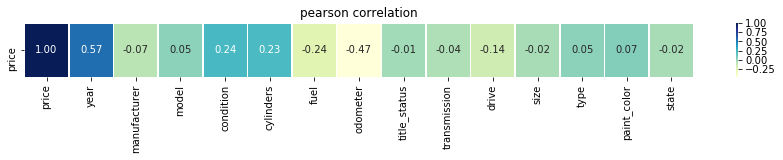

In [38]:
corr = corr_matrix(df_final, method='pearson', negative=True, lst_filters=['price'], figsize=(15,1))

D'apres la matrice de correlation, les variables ayant le plus de correlation avec la variable Price sont :  
    -year  
    -odometer  
    -fuel  
    -condition  
    -cylinders  
    -drive

Ces colonnes ont de grandes chances d'etre dans le modele final

### 1. Relation year/price

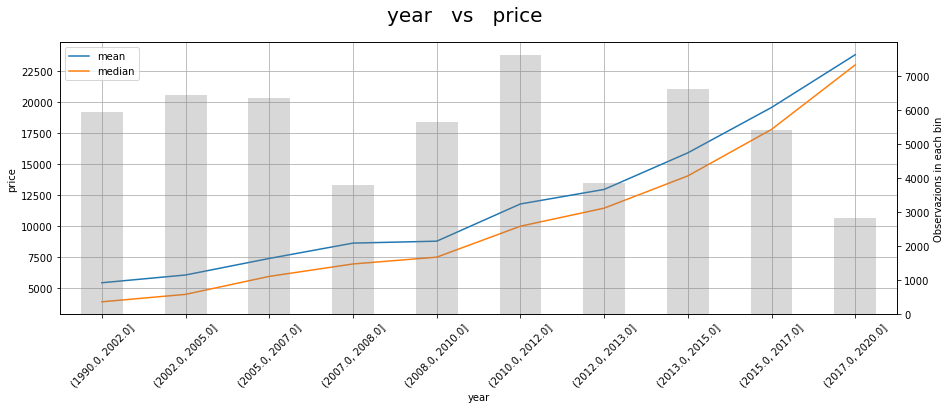

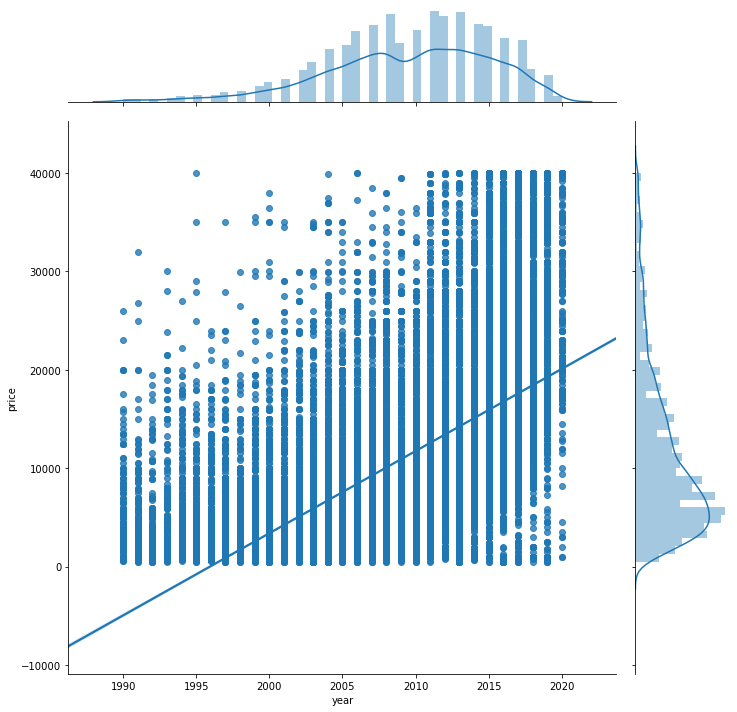

In [30]:
bivariate_plot(df_final, x='year', y = 'price', figsize=(15,5))

### 2. Relation odometer/price

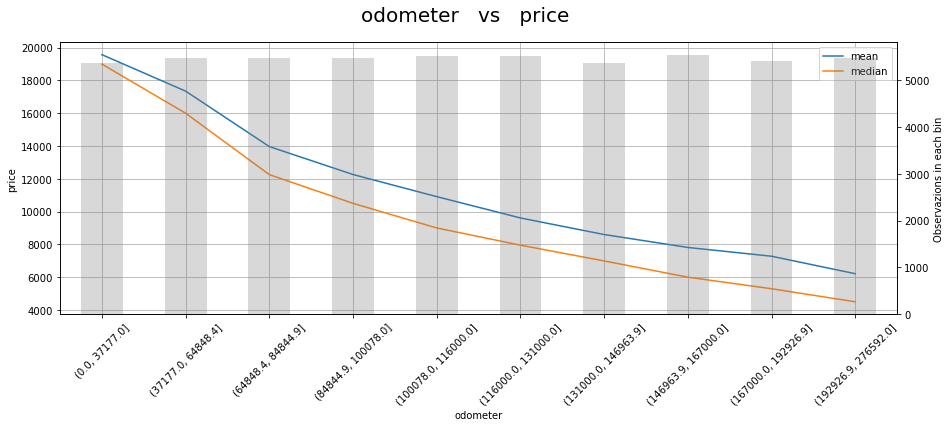

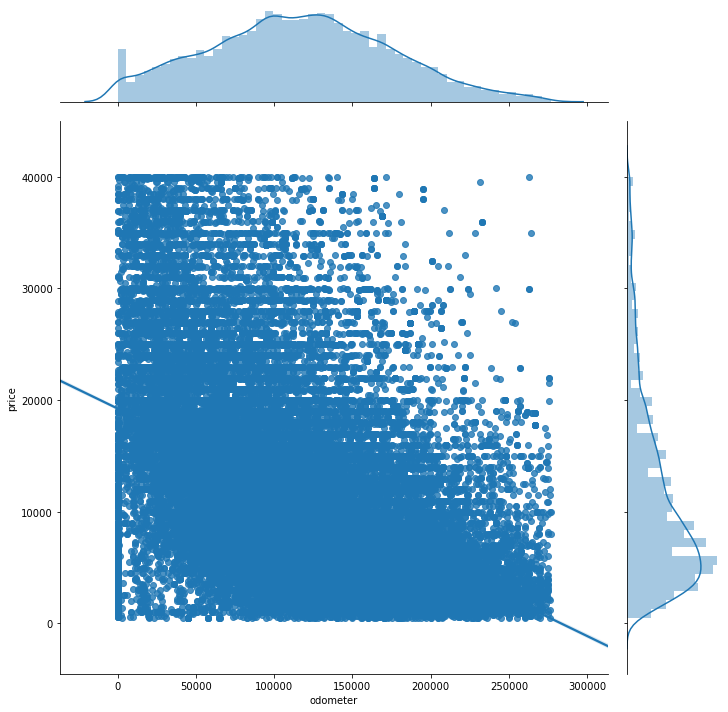

In [31]:
bivariate_plot(df_final, x='odometer', y = 'price', figsize=(15,5))

### 3. Relation fuel/price

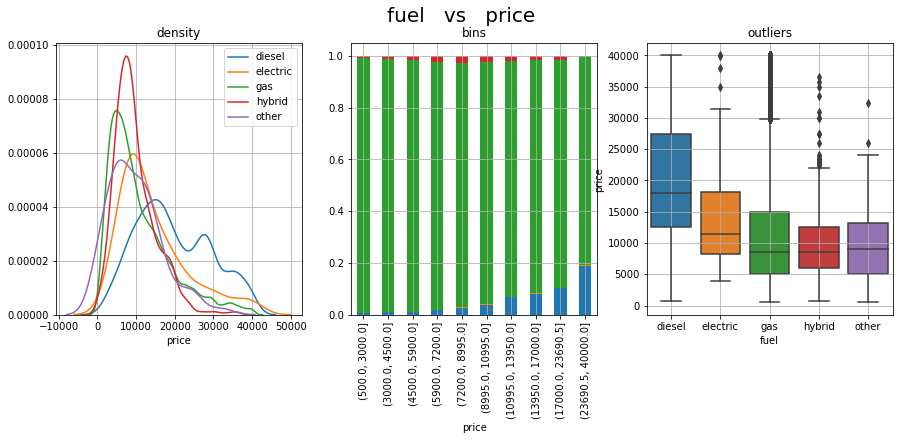

In [32]:
bivariate_plot(df_final, x='fuel', y = 'price', figsize=(15,5))

La courbe diesel (bleue) est nettement decalee par rapport aux autres  
Sur le 3eme graph, le prix moyen des voitures diesel est plus eleve que celui des autres

### 4. Relation condition/price

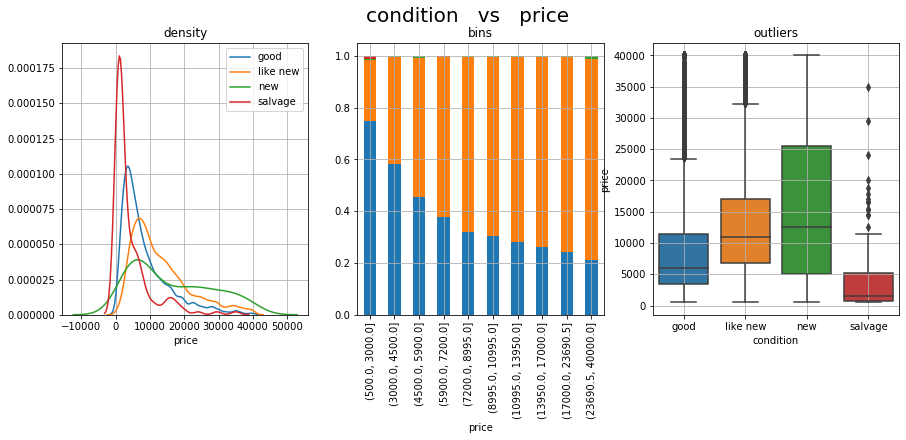

In [33]:
bivariate_plot(df_final, x='condition', y = 'price', figsize=(15,5))

L'etat general de la voiture joue sur le prix, plus elle est neuve et plus elle devient chere

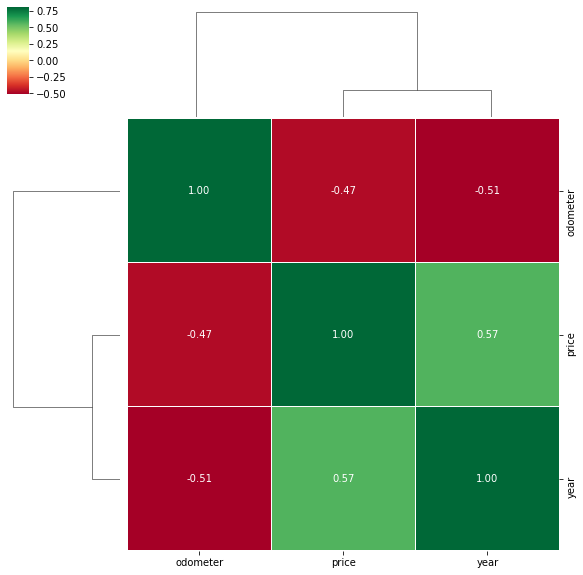

In [36]:
# Le clustermap aide egalement a voir quelles sont les variables correlees entre elles
sns.clustermap(df_final.corr(),vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white',cmap= "RdYlGn", linewidths=0.01)

## Relation Variables / Variables


--- WARNING: Factorizing 39 labels of manufacturer ---
--- WARNING: Factorizing 7349 labels of model ---
--- WARNING: Factorizing 4 labels of condition ---
--- WARNING: Factorizing 8 labels of cylinders ---
--- WARNING: Factorizing 5 labels of fuel ---
--- WARNING: Factorizing 6 labels of title_status ---
--- WARNING: Factorizing 3 labels of transmission ---
--- WARNING: Factorizing 3 labels of drive ---
--- WARNING: Factorizing 4 labels of size ---
--- WARNING: Factorizing 13 labels of type ---
--- WARNING: Factorizing 12 labels of paint_color ---
--- WARNING: Factorizing 51 labels of state ---


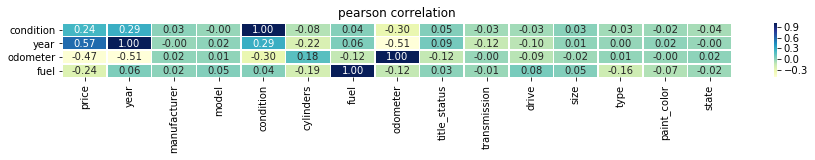

In [45]:
corr2 = corr_matrix(df_final, method='pearson', negative=True, lst_filters=['condition', 'year', 'odometer', 'fuel'], figsize=(15,1))

### 1. Relation odometer/condition

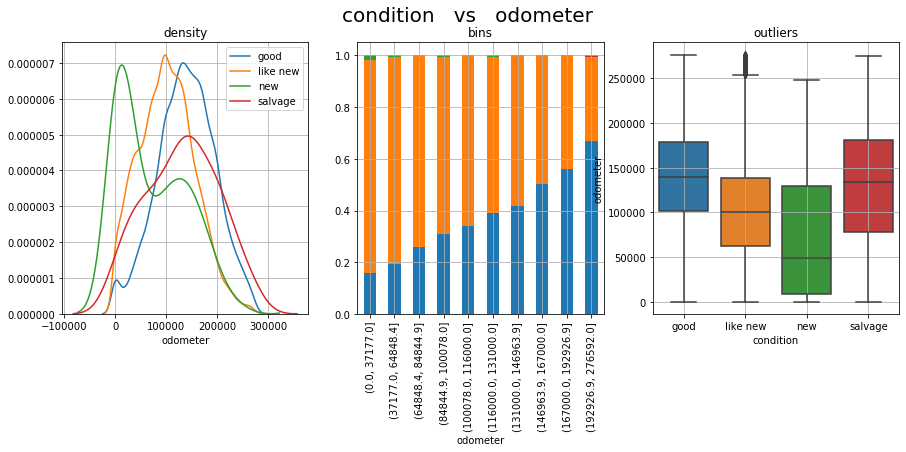

In [46]:
bivariate_plot(df_final, x='condition', y = 'odometer', figsize=(15,5))

### 2. Relation odometer/year

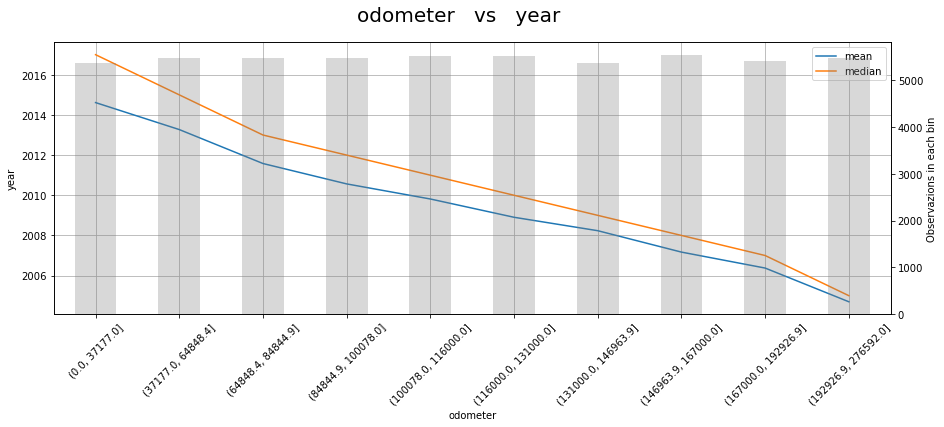

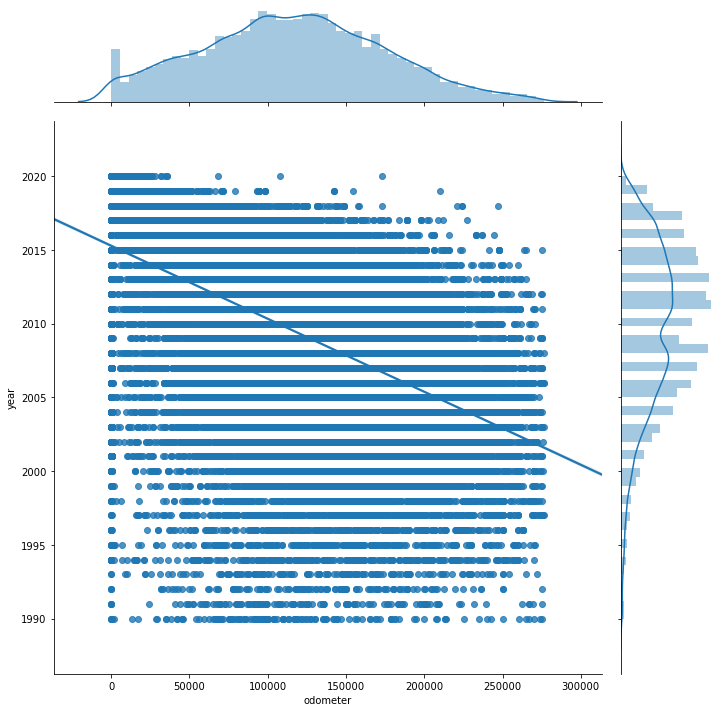

In [47]:
bivariate_plot(df_final, x='odometer', y = 'year', figsize=(15,5))

Les variables odometer, year, condition, ou encore fuel sont celles a prendre le plus en consideration dans l'elaboration de notre modele

In [48]:
# Sauvegarde du dataset final pour le model building
df_final.to_csv('best_cars.csv', index=False)

In [61]:
# Creation d'un dataset pour visualisation sur tableau
df_tab = data.copy()

In [62]:
df_tab.shape

(423857, 25)

In [63]:
df_tab= df_tab.drop(columns= ['id', 'url','region','region_url','image_url','vin','description', 'county'], axis=1)

In [64]:
df_tab1 = remove_outlier(df_tab, 'price')
df_tab2 = remove_outlier(df_tab1, 'odometer')
df_tab_final=  df_tab2[(df_tab2['price'] <= 40200 ) & (df_tab2['price'] >= 500) ]
year_filter = (df_tab_final['year'] > 1989) & (df_tab_final['year'] <= 2020)
df_tab_final= df_tab_final.loc[year_filter]
print(df_tab_final.shape)

(223594, 17)


In [65]:
df_tab_final= df_tab_final.dropna(axis=0)
df_tab_final.shape

(54206, 17)

In [66]:
etat= {'excellent': 'like new', 'fair':'good'}
df_tab_final['condition']= df_tab_final['condition'].replace(etat)
df_tab_final.condition.value_counts()

like new    33138
good        20725
new           194
salvage       149
Name: condition, dtype: int64

In [67]:
df_tab_final.to_csv('tab_cars.csv', index=False)